# Session 3: Hands-on Exercises:
# “Is my ML model wrong?” - Using Trustee in Practice

In this session, we will evaluate a learning model published in a recent paper to separate the VPN traffic from the nonVPN traffic. The paper uses a deep-neural network on the CIC-IDS dataset. Then, we will use Trustee to show an instance of shortcut learning, in which the model easily picks up on features not related to the problem to separate the two classes of traffic.


# Install dependencies

* Use `pip` to install dependencies.
* Install `graphviz` to render decision trees.

In [ ]:
!pip install jedi cython dpkt matplotlib numpy pandas scapy pdf2image scipy trustee==1.1.4 2> /dev/null > /dev/null
!apt -qqq install graphviz poppler-utils

In [ ]:
!git clone https://github.com/TrusteeML/emperor.git
import sys
sys.path.append('/content/emperor/use_cases/vpn_case/')


In [ ]:
import sys
sys.path.append('/content/emperor/use_cases/vpn_case/')

---
# Traditional ML Pipeline

* Read CIC-IDS-2017 dataset

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
import os
import input_data
from deeptraffic import DeepTraffic

dict_2class = {0: "NonVPN", 1: "VPN"}  # classes
class_names = dict_2class.values()

DATA_DIR = "/content/emperor/use_cases/vpn_case/res/dataset/train_test/2class/SessionAllLayers"
MODEL_DIR = os.path.split(DATA_DIR)[1]

dataset = input_data.read_data_sets(DATA_DIR, one_hot=True, num_classes=len(dict_2class))

Train a Deep Learning Classifier

In [ ]:
deep_traffic = DeepTraffic()
deep_traffic.fit(dataset.train, model_dir=MODEL_DIR)

In [ ]:
X_train = dataset.train.images
y_train = np.array([np.argmax(i) for i in dataset.train.labels])
X_test = dataset.test.images
y_test = np.array([np.argmax(i) for i in dataset.test.labels])

y_pred = deep_traffic.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, digits=3, target_names=class_names))

---
# Unlocking the Black Box with Trustee
Run Classification Trustee on trained Deep Neural Network

In [ ]:
import graphviz
from sklearn import tree

# Initialize Trustee
# TODO


#Train a Decision Tree to Imitate the Expert Model.

<font color="blue">`fit(X, y, top_k=10, max_leaf_nodes=None, max_depth=None, ccp_alpha=0.0, train_size=0.7, num_iter=50, num_stability_iter=5, num_samples=2000, samples_size=None, use_features=None, predict_method_name='predict', optimization='fidelity', aggregate=True, verbose=False)`</font>


**PARAMETERS:**

* **X** *({array-like, sparse matrix} of shape (n_samples, n_features))* – The training input samples. Internally, it will be converted to a pandas DataFrame.
* **y** *(array-like of shape (n_samples,) or (n_samples, n_outputs))* – The target values for X (class labels in classification, real numbers in regression). Internally, it will be converted to a pandas Series.
* **top_k** *(int, default=10)* – Number of top-k branches, sorted by number of samples per branch, to keep after finding decision tree with highest fidelity.
* **max_leaf_nodes** *(int, default=None)* – Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
* **max_depth** *(int, default=None)* – The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure.
* **ccp_alpha** *(float, default=0.0)* – Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning here for details: https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning
* **train_size** *(float or int, default=0.7)* – If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples.
* **num_iter** *(int, default=50)* – Number of iterations to repeat Trustee inner-loop for.
* **num_stability_iter** *(int, default=5)* – Number of stability to repeat Trustee stabilization outer-loop for.
* **num_samples** *(int, default=2000)* – The absolute number of samples to fetch from the training dataset split to train the student decision tree model. If the samples_size argument is provided, this arg is ignored.
* **samples_size** *(float, default=None)* – The fraction of the training dataset to use to train the student decision tree model. If None, the value is automatically set to the num_samples provided value.
* **use_features** *(array-like, default=None)* – Array-like of integers representing the indexes of features from the X training samples. If not None, only the features indicated by the provided indexes will be used to train the student decision tree model.
* **predict_method_name** *(str, default="predict")* – The method interface to use to get predictions from the expert model. If no value is passed, the default predict interface is used.
* **optimization** *({"fidelity", "accuracy"}, default="fidelity")* – The comparison criteria to optimize the decision tree students in Trustee inner-loop. Used for ablation study only.
* **aggregate** *(bool, default=True)* – Boolean indicating whether dataset aggregation should be used in Trustee inner-loop. Used for ablation study only.
* **verbose** *(bool, default=False)* – Boolean indicating whether to log messages.

For this tutorial, specify only the parameters **X, y, num_iter=30, num_stability_iter, samples_size, verbose=True**.

In [ ]:
# Fit for classification models
# TODO

---
#Generate an Explanation

<font color="blue">`explain(top_k=10)`</font>

Returns explainable model that best imitates Expert model, based on highest mean agreement and highest fidelity.

**RETURNS:**

* **top_student** – `(dt, pruned_dt, agreement, reward)`
* **dt**: *{DecisionTreeClassifier, DecisionTreeRegressor}* -
Unconstrained fitted student model.
* **pruned_dt**: *{DecisionTreeClassifier, DecisionTreeRegressor}* - Top-k pruned fitted student model.
* **agreement**: *float* - Mean agreement of pruned student model with respect to others.
* **reward**: *float* - Fidelity of student model to the expert model.

**RETURN TYPE:**

* tuple

In [ ]:
# Get the best explanation from Trustee
# TODO

print(f"Model explanation training (agreement, fidelity): ({agreement}, {reward})")
print(f"Model Explanation size: {dt.tree_.node_count}")
print(f"Top-k Prunned Model explanation size: {pruned_dt.tree_.node_count}")

---
**Evaluate explanations produced by Trustee**

In [ ]:
# Use explanations to make predictions
# TODO

# Evaluate accuracy and fidelity of explanations
print("Model explanation global fidelity report:")
print(classification_report(y_pred, dt_y_pred))
print("Top-k Model explanation global fidelity report:")
print(classification_report(y_pred, pruned_dt_y_pred))

print("Model explanation score report:")
print(classification_report(y_test, dt_y_pred))
print("Top-k Model explanation score report:")
print(classification_report(y_test, pruned_dt_y_pred))

---
**Render Decision Tree Explanation**

Saves the output to the PDF file pruned_dt_explanation.pdf

In [ ]:
# Output decision tree to pdf
dot_data = tree.export_graphviz(
    dt,
    class_names=dict_2class,
    # feature_names=feature_names,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph.render("dt_explanation")

# Output pruned decision tree to pdf
dot_data = tree.export_graphviz(
    pruned_dt,
    class_names=dict_2class,
    # feature_names=feature_names,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph.render("pruned_dt_explanation")

#First Bytes of the non VPN Traffic

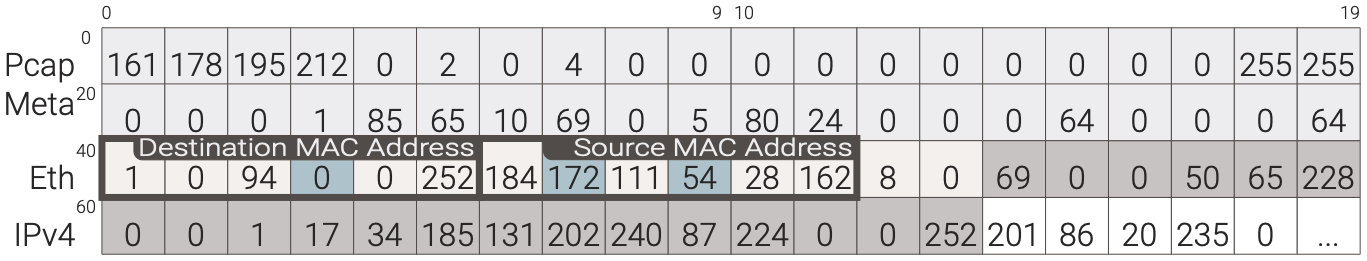

# First Bytes of the VPN Traffic

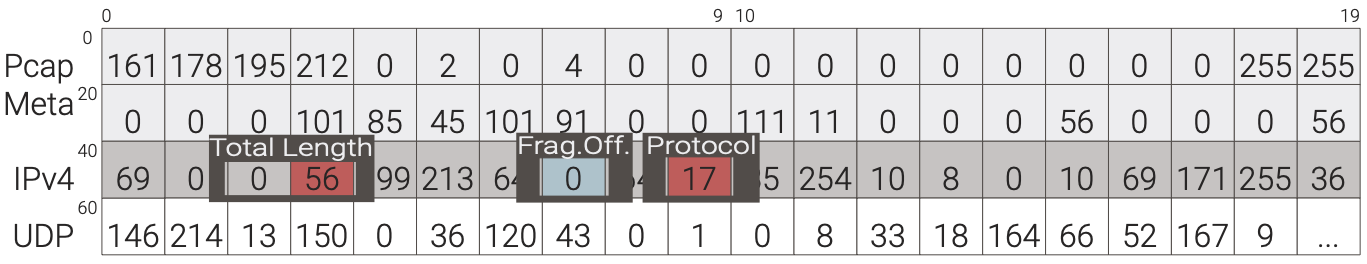

**Render Decision Tree Explanation**

Shows the image

In [ ]:
from pdf2image import convert_from_path

images = convert_from_path("pruned_dt_explanation.pdf")
images[0]

**Analyze the Decision Tree**

Analyze the decision tree generated by Trustee to determine the fields that are most important in the classification.


Just describe the fields in this text box.